### Problem 01 - Coca Cola Sales
Forecast the CocaCola prices. Prepare a document for each model explaining,how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

#### 1. Importing Necessary Libraries

In [382]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, StandardScaler
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#### 2. Importing the Data set

In [309]:
data = pd.read_csv('CocaCola_Sales_Rawdata.csv')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [310]:
data_1 = pd.read_csv('CocaCola_Sales_Rawdata.csv')
data_1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [172]:
a = data_1.Quarter.replace(to_replace={'Q1_':'01-01-19','Q2_':'04-01-19','Q3_':'07-01-19','Q4_':'10-01-19'}, regex=True)
a = pd.DataFrame(data=a)
data_1['Quarter'] = a
data_1.head()

,Quarter,Sales
0,01-01-1986,1734.827000
1,04-01-1986,2244.960999
2,07-01-1986,2533.804993
3,10-01-1986,2154.962997
4,01-01-1987,1547.818996


In [173]:
data_1['Quarter'] = pd.to_datetime(data_1['Quarter'])
data_1.head()

,Quarter,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996


#### 3. Data Understanding

In [311]:
data_1.shape

(42, 2)

In [312]:
data_1.dtypes

Quarter     object
Sales      float64
dtype: object

In [313]:
data_1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [314]:
data_1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


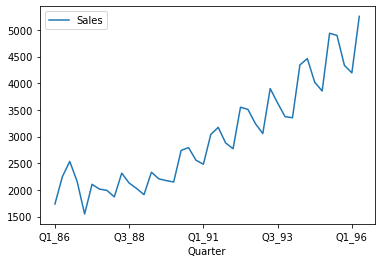

In [315]:
series = pd.read_csv('CocaCola_Sales_Rawdata.csv', header=0, index_col=0,parse_dates=True)
series.plot()
plt.show()

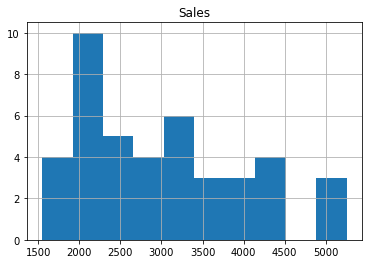

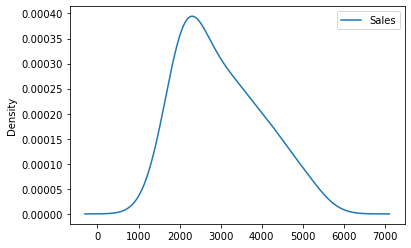

In [316]:
series = pd.read_csv('CocaCola_Sales_Rawdata.csv', header=0, index_col=0,parse_dates=True)
series.hist()
series.plot(kind='kde')
plt.show()

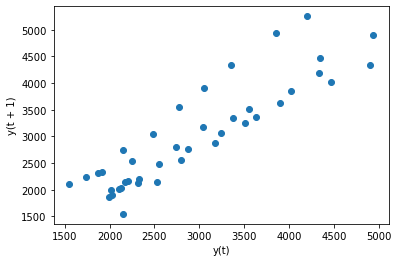

In [317]:
series = pd.read_csv('CocaCola_Sales_Rawdata.csv',index_col=0,parse_dates=True)
lag_plot(series)
plt.show()

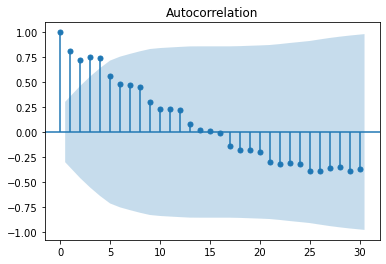

In [318]:
series = pd.read_csv('CocaCola_Sales_Rawdata.csv',index_col=0,parse_dates=True)
plot_acf(series,lags=30)
plt.show()

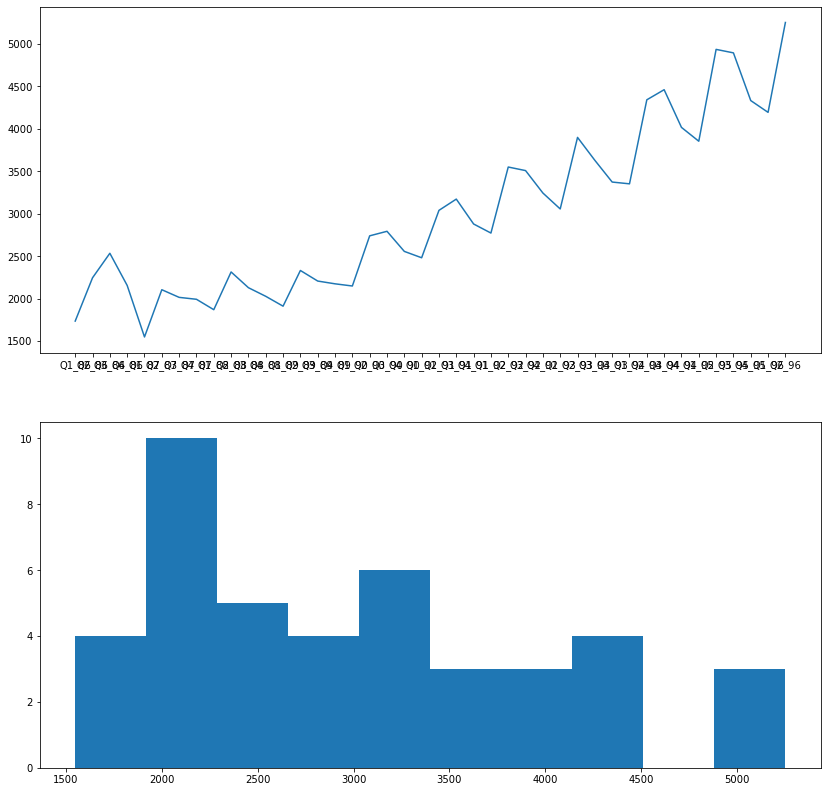

In [319]:
plt.figure(figsize=(14,14))
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show()

In [320]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = np.sqrt(dataframe['Sales'])

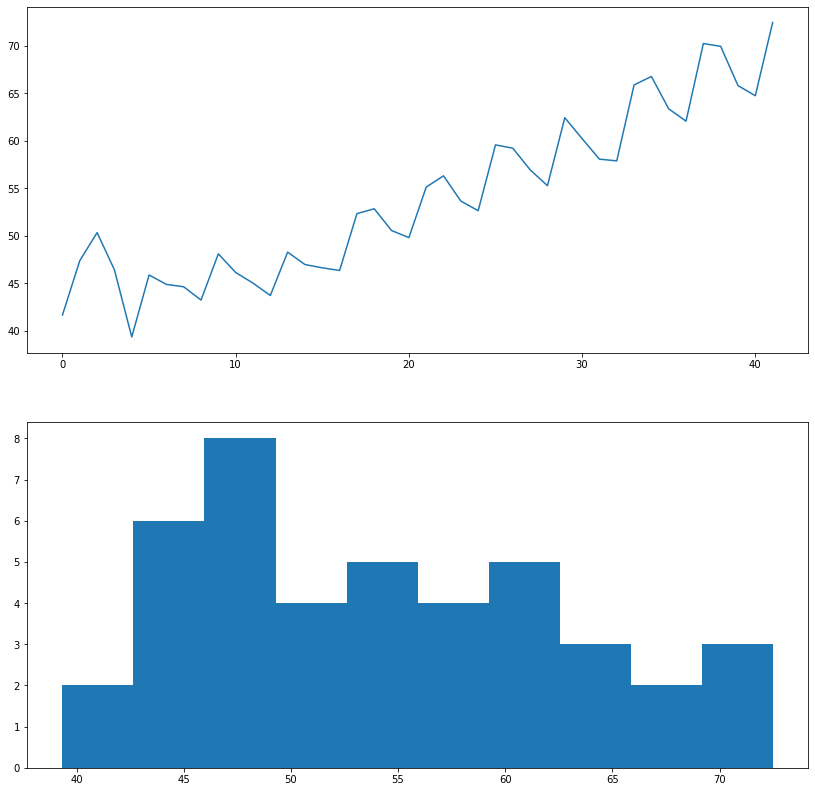

In [321]:
plt.figure(figsize=(14,14))
# line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

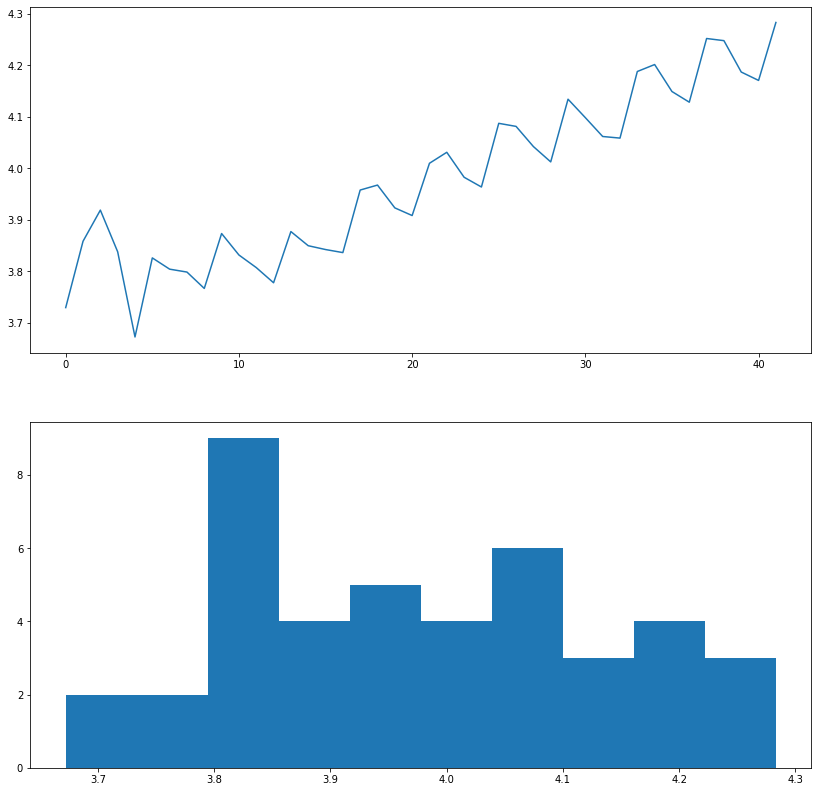

In [322]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = np.log(dataframe['Sales'])
plt.figure(figsize=(14,14))
# line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

#### 4. Data Preparation 

In [323]:
Train_1 = data_1.head(34)
Test_1 = data_1.tail(8)

In [354]:
data_2 = pd.get_dummies(data_1, columns = ['Quarter'])
data_2.head()

,Sales,Quarter_Q1_86,Quarter_Q1_87,Quarter_Q1_88,Quarter_Q1_89,Quarter_Q1_90,Quarter_Q1_91,Quarter_Q1_92,Quarter_Q1_93,Quarter_Q1_94,...,Quarter_Q4_86,Quarter_Q4_87,Quarter_Q4_88,Quarter_Q4_89,Quarter_Q4_90,Quarter_Q4_91,Quarter_Q4_92,Quarter_Q4_93,Quarter_Q4_94,Quarter_Q4_95
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
data_2.columns = ['Sales','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2']

In [326]:
t= np.arange(1,43)

In [327]:
data_2['t'] = t

In [328]:
data_2['t_sq'] = data_2['t']*data_2['t']

In [329]:
log_Sales=np.log(data_2['Sales'])

In [330]:
data_2['log_Sales']=log_Sales

In [331]:
data_2.head()

,Sales,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,...,Q4,Q1,Q2,Q3,Q4,Q1,Q2,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [332]:
Train_2 = data_2.head(34)
Test_2 = data_2.tail(8)

#### 5. Model Preparation|6. Model Building | 7.Model Testing 

##### 1. Model Driven

In [333]:
#Linear Model
linear_model = smf.ols('Sales ~ t',data=Train_2).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test_2['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(pred_linear))**2))
rmse_linear

720.6137818364056

In [334]:
#Exponential

Exp = smf.ols('log_Sales ~ t',data=Train_2).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_2['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.9850937736732

In [335]:
#Quadratic 

Quad = smf.ols('Sales~t_sq',data=Train_2).fit()
pred_Quad = pd.Series(Quad.predict(Test_2[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

416.6991375881117

In [336]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train_2).fit()
pred_add_sea = pd.Series(add_sea.predict(Test_2[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1980.5455985923422

In [337]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=Train_2).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test_2[['Q1','Q2','Q3','Q4','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

455.98470038383294

In [338]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train_2).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test_2))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2489.5670784863414

In [339]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train_2).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test_2))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test_2['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

2793.873238842763

In [340]:
#Compare the results 
data_comp = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,416.699138
4,rmse_add_sea_quad,455.984700
1,rmse_Exp,564.985094
0,rmse_linear,720.613782
3,rmse_add_sea,1980.545599
5,rmse_Mult_sea,2489.567078
6,rmse_Mult_add_sea,2793.873239


##### 2. Data Driven

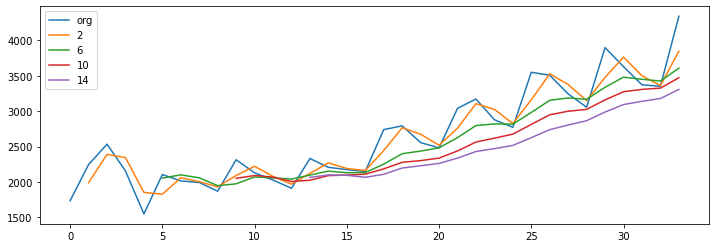

In [341]:
plt.figure(figsize=(12,4))
Train_1.Sales.plot(label="org")
for i in range(2,16,4):
    Train_1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [342]:
# Evaluation Metric RMSE
def RMSE(pred,org): 
    temp = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return np.mean(temp)

In [414]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train_1["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_ses = RMSE(pred_ses,Test_1.Sales) 

In [415]:
# Holt method 
hw_model = Holt(Train_1["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_hw = RMSE(pred_hw,Test_1.Sales) 

In [416]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train_1["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_hwe_add_add = RMSE(pred_hwe_add_add,Test_1.Sales) 

In [417]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train_1["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_hwe_mul_add = RMSE(pred_hwe_mul_add,Test_1.Sales)

In [418]:
#Compare the results 

data_comp = {"MODEL":pd.Series(["Simple Exponential Method","Holt method ","Holts winter exponential smoothing with additive seasonality and additive trend","Holts winter exponential smoothing with multiplicative seasonality and additive trend"]),"RMSE_Values":pd.Series([RMSE_ses,RMSE_hw,RMSE_hwe_add_add,RMSE_hwe_mul_add])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,Holts winter exponential smoothing with additi...,230.091772
3,Holts winter exponential smoothing with multip...,252.254363
1,Holt method,582.455429
0,Simple Exponential Method,1067.251602


##### 3. ARIMA

In [355]:
arr_Train_1 = np.array(Train_1['Sales'])

In [356]:
arr_Test_1 = np.array(Test_1['Sales'])

In [349]:
# walk-forward validation
history = [x for x in np.array(Train_1['Sales'])]
predictions = list()
for i in range(len(np.array(Test_1['Sales']))):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = arr_Test_1[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(arr_Test_1, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 598.636


In [350]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [380]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(arr_Train_1, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [388]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [389]:
evaluate_models(arr_Train_1, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=939.210
ARIMA(0, 0, 1) RMSE=709.613
ARIMA(0, 0, 2) RMSE=486.369
ARIMA(0, 1, 0) RMSE=441.614
ARIMA(0, 1, 1) RMSE=431.208
ARIMA(0, 1, 2) RMSE=401.954
ARIMA(0, 1, 3) RMSE=335.929
ARIMA(0, 1, 4) RMSE=284.799
ARIMA(0, 2, 0) RMSE=630.296
ARIMA(0, 2, 1) RMSE=463.793
ARIMA(0, 2, 2) RMSE=387.434
ARIMA(0, 2, 3) RMSE=397.802
ARIMA(1, 0, 0) RMSE=530.211
ARIMA(1, 1, 0) RMSE=438.926
ARIMA(1, 2, 0) RMSE=623.370
ARIMA(2, 0, 0) RMSE=546.459
ARIMA(2, 1, 0) RMSE=354.108
ARIMA(2, 2, 0) RMSE=554.958
ARIMA(3, 0, 0) RMSE=467.495
ARIMA(3, 1, 0) RMSE=257.699
ARIMA(3, 2, 0) RMSE=160.067
ARIMA(4, 1, 0) RMSE=168.595
ARIMA(4, 2, 0) RMSE=165.337
Best ARIMA(3, 2, 0) RMSE=160.067


In [391]:
# load data
train = read_csv('CocaCola_Sales_Rawdata.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = arr_Train_1.astype('float32')
arr_Test_1_float = arr_Train_1.astype('float32')

In [399]:
# fit model
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit(disp=0)
forecast=model_fit.forecast(steps=8)[0]

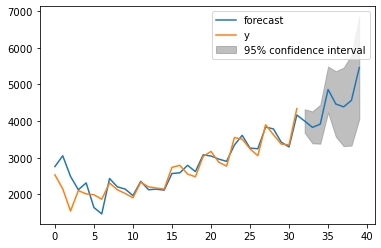

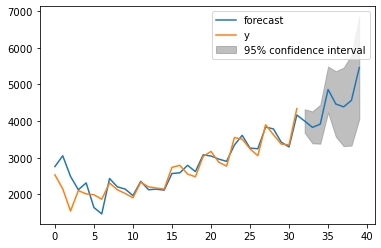

In [411]:
model_fit.plot_predict(2, 41)

In [413]:
evaluate_arima_model(arr_Train_1, (3,2,0))

160.06661561998254

#### 8. Output Interpretation, Results Comparison and Conclusion

In [419]:
#Compare the results (Model Base Method)
data_comp = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,416.699138
4,rmse_add_sea_quad,455.984700
1,rmse_Exp,564.985094
0,rmse_linear,720.613782
3,rmse_add_sea,1980.545599
5,rmse_Mult_sea,2489.567078
6,rmse_Mult_add_sea,2793.873239


In [420]:
#Compare the results (Data Driven Model)
data_comp = {"MODEL":pd.Series(["Simple Exponential Method","Holt method ","Holts winter exponential smoothing with additive seasonality and additive trend","Holts winter exponential smoothing with multiplicative seasonality and additive trend"]),"RMSE_Values":pd.Series([RMSE_ses,RMSE_hw,RMSE_hwe_add_add,RMSE_hwe_mul_add])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,Holts winter exponential smoothing with additi...,230.091772
3,Holts winter exponential smoothing with multip...,252.254363
1,Holt method,582.455429
0,Simple Exponential Method,1067.251602


In [421]:
#Compare the results (ARIMA Model)
evaluate_arima_model(arr_Train_1, (3,2,0))

160.06661561998254